Epoch 1/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0761 - accuracy: 0.9713 - val_loss: 0.3285 - val_accuracy: 0.9247
Epoch 2/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0687 - accuracy: 0.9734 - val_loss: 0.3372 - val_accuracy: 0.9239
Epoch 3/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0655 - accuracy: 0.9746 - val_loss: 0.3328 - val_accuracy: 0.9297
(3, 3, 1, 32) (32,)
-0.06295323 0.3950234


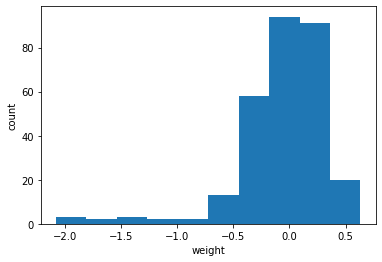

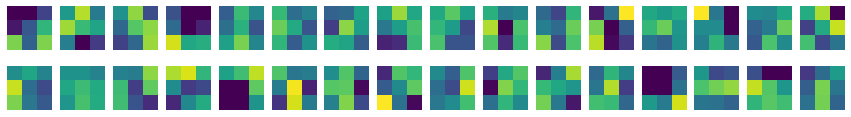

(3, 3, 1, 32)
0.00176916 0.07955871


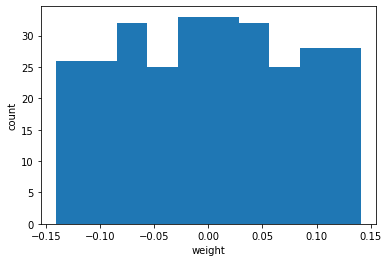

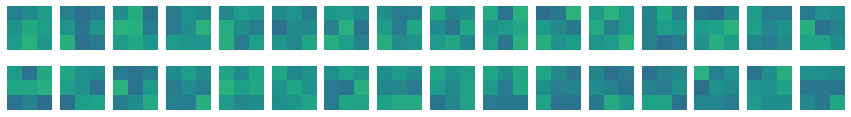

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


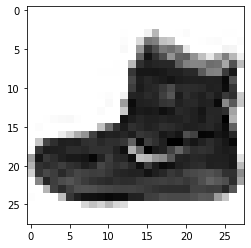

(1, 28, 28, 32)


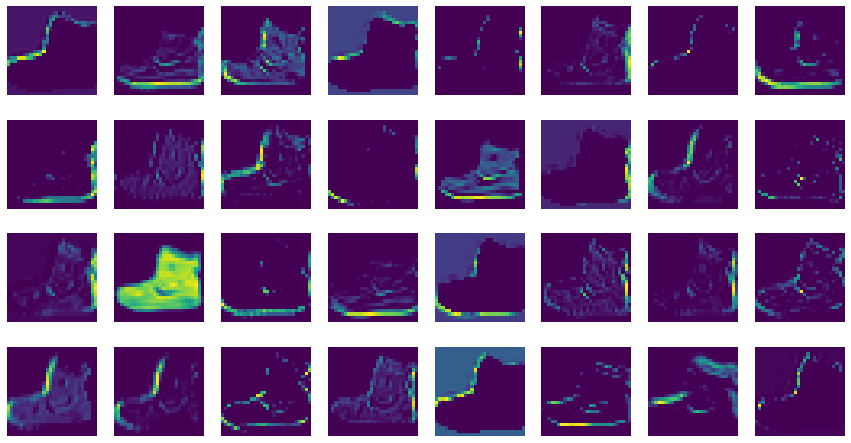

(1, 14, 14, 64)


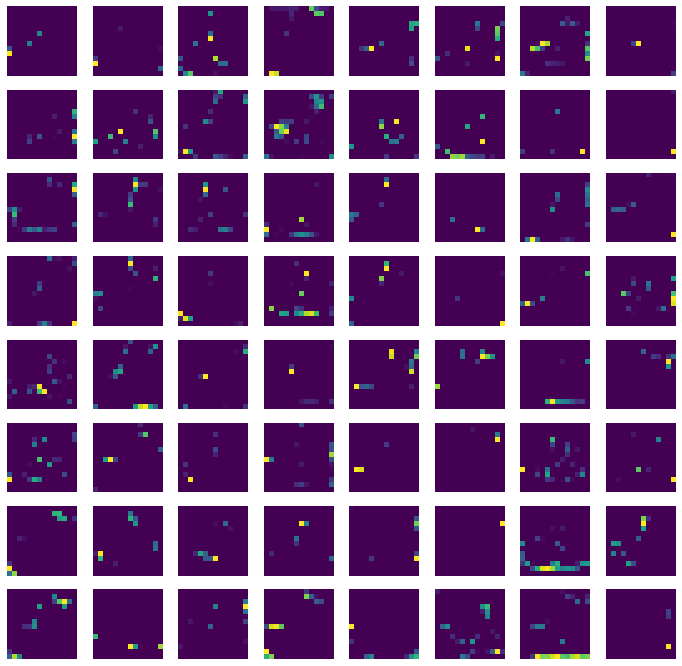

In [29]:
#패션 MNIST 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

#모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

######################################################


#가중치 시각화
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

model.layers

conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation =\
                                          'relu', padding='same',input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()


#함수형 API
print(model.input)

conv_acti = keras.Model(model.input, model.layers[0].output)

#특성 맵 시각화
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

conv2_acti = keras.Model(model.input, model.layers[2].output)

inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1,28,28,1)/255.0)

print(feature_maps.shape)

fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()